In [36]:
import matplotlib.pyplot as plt
import csv
import numpy as np

begin, end = 2, 30 # (begin is inclusive, end is exclusive)
time = np.arange(begin, end, 1)

# Class to cleanly save samples
class Sample:
    def __init__(self):
        self.data = {
            'RawEEG': [],
            'Alpha': [],
            'Low Beta': [],
            'High Beta': [],
            'Gamma': [],
            'Theta': [],
            'Delta': [],
            'Meditation': [],
            'Attention': []
        }
    
    def recordDataPoint(self, RawEEG, Attention, Meditation, Alpha, Delta, Theta, LowBeta, HighBeta, Gamma):
        self.data['RawEEG'].append(float(RawEEG))
        self.data['Attention'].append(float(Attention))
        self.data['Meditation'].append(float(Meditation))
        self.data['Alpha'].append(float(Alpha))
        self.data['Delta'].append(float(Delta))
        self.data['Theta'].append(float(Theta))
        self.data['Low Beta'].append(float(LowBeta))
        self.data['High Beta'].append(float(HighBeta))
        self.data['Gamma'].append(float(Gamma))
        
    def getEEG(self):
        return self.data['RawEEG']
    
    def getAttention(self):
        return self.data["Attention"]
    
    def getMeditation(self):
        return self.data["Meditation"]
    
    def getAlpha(self):
        return self.data["Alpha"]
    
    def getDelta(self):
        return self.data["Delta"]
    
    def getTheta(self):
        return self.data["Theta"]
    
    def getLowBeta(self):
        return self.data["Low Beta"]
    
    def getHighBeta(self):
        return self.data["High Beta"]
    
    def getGamma(self):
        return self.data["Gamma"]

    def get(self, key):
        return self.data[key]

    '''
    Scales the data by standard deviation of the EEG data
    '''
    def scale(self):
        eeg_std_dev = np.std(self.data['RawEEG'])
        self.data['Alpha'] = [x / eeg_std_dev for x in self.data['Alpha']]
        self.data['Delta'] = [x / eeg_std_dev for x in self.data['Delta']]
        self.data['Theta'] = [x / eeg_std_dev for x in self.data['Theta']]
        self.data['Low Beta'] = [x / eeg_std_dev for x in self.data['Low Beta']]
        self.data['High Beta'] = [x / eeg_std_dev for x in self.data['High Beta']]
        self.data['Gamma'] = [x / eeg_std_dev for x in self.data['Gamma']]

In [37]:
data = []
dataLabels = []

folder = "raw_data"

def transcribeFileToSample(sampleNum: int, brainState: str):

    sampleData = Sample()
    
    with open(folder + "/" + brainState + str(sampleNum) + ".csv") as csvFile:
        reader = csv.reader(csvFile)
        header = next(reader)

        readingFirstLine = begin
        linesRead = 0

        for row in reader:
            if readingFirstLine > 0:
                readingFirstLine -= 1
                continue
            
            sampleData.recordDataPoint(row[0], row[7], row[8], row[1], row[2], row[6], row[4], row[5], row[3])

            linesRead += 1
            if(linesRead >= end - begin):
                break

    sampleData.scale()
    
    data.append(sampleData)
    dataLabels.append(brainState)

# Transcribe active
for i in range(1,17):
    transcribeFileToSample(i, "active")
    
# Transcribe meditate
for i in range(1,16):
    transcribeFileToSample(i, "meditate")

# Transcribe neutral
for i in range(1,16):
    transcribeFileToSample(i, "neutral")


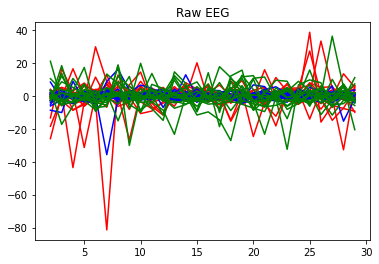

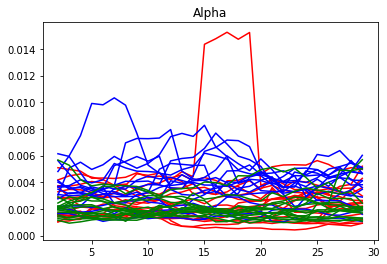

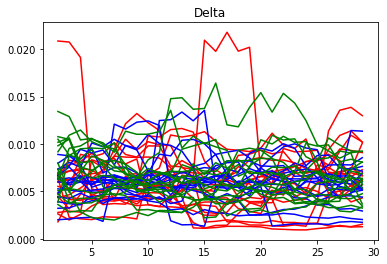

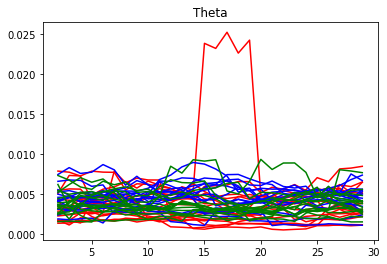

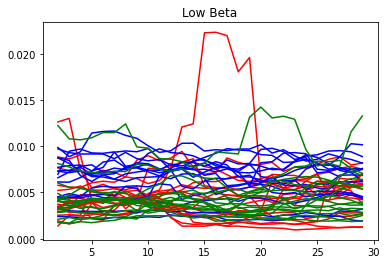

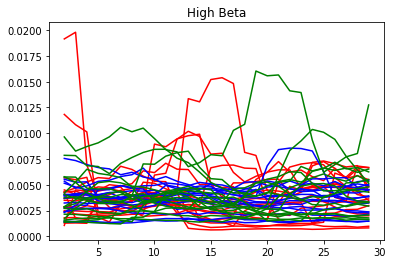

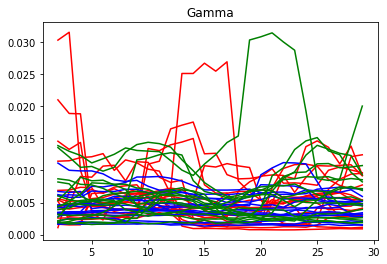

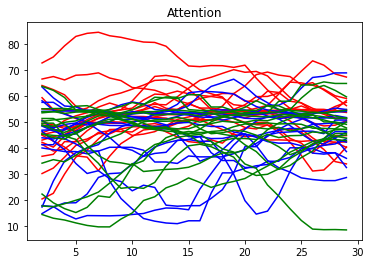

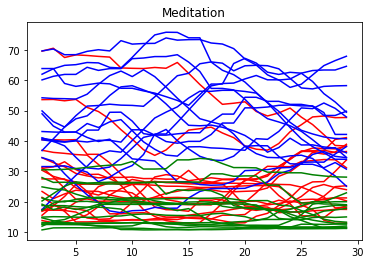

<Figure size 432x288 with 0 Axes>

In [38]:
x = np.arange(begin, end, 1)

# Plot EEG Data

plt.title("Raw EEG")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getEEG(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getEEG(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getEEG(), 'b')
plt.show()
plt.clf()

plt.title("Alpha")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getAlpha(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getAlpha(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getAlpha(), 'b')
plt.show()
plt.clf()

plt.title("Delta")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getDelta(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getDelta(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getDelta(), 'b')
plt.show()
plt.clf()

plt.title("Theta")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getTheta(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getTheta(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getTheta(), 'b')
plt.show()
plt.clf()

plt.title("Low Beta")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getLowBeta(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getLowBeta(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getLowBeta(), 'b')
plt.show()
plt.clf()


plt.title("High Beta")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getHighBeta(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getHighBeta(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getHighBeta(), 'b')
plt.show()
plt.clf()

plt.title("Gamma")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getGamma(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getGamma(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getGamma(), 'b')
plt.show()
plt.clf()

plt.title("Attention")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getAttention(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getAttention(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getAttention(), 'b')
plt.show()
plt.clf()

plt.title("Meditation")
for i in range(len(data)):
    if dataLabels[i] == "active":
        plt.plot(x, data[i].getMeditation(), 'r')
    elif dataLabels[i] == "neutral":
        plt.plot(x, data[i].getMeditation(), 'g')
    elif dataLabels[i] == "meditate":
        plt.plot(x, data[i].getMeditation(), 'b')
plt.show()
plt.clf()
